In [1]:
# Dependencies
!pip install roboflow
!pip install python-dotenv
!pip install ultralytics
from roboflow import Roboflow
from google.colab import userdata
from ultralytics import YOLO

   ━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━ 22.8/49.9 MB 1.2 MB/s eta 0:00:23
^C
  Using cached python_dotenv-1.1.1-py3-none-any.whl.metadata (24 kB)


ModuleNotFoundError: No module named 'roboflow'

In [2]:
# Check GPU Access
!nvidia-smi

Sat Jul 12 15:45:51 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   39C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [3]:
# Import the dataset
from roboflow import Roboflow
from google.colab import userdata

api = Roboflow(api_key=userdata.get("ROBOFLOW_DATASET_API"))
project = api.workspace("traintrackproject").project("traintracks")
version = project.version(4)
dataset = version.download("yolov12")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Traintracks-4 in yolov12:: 100%|██████████| 4308/4308 [00:03<00:00, 1241.93it/s]


In [4]:
# Import Model: YOLOv12
!git clone https://github.com/sunsmarterjie/yolov12.git

%cd yolov12

# Flash Attention 2.x requires > CUDA 12.0 and > PyTorch 2.2
!wget https://github.com/Dao-AILab/flash-attention/releases/download/v2.8.1/flash_attn-2.8.1+cu12torch2.4cxx11abiFALSE-cp310-cp310-linux_x86_64.whl

!pip install -r requirements.txt
!pip install -e .


Cloning into 'yolov12'...
remote: Enumerating objects: 1156, done.
remote: Counting objects: 100% (513/513), done.
remote: Compressing objects: 100% (232/232), done.
remote: Total 1156 (delta 323), reused 280 (delta 280), pack-reused 643 (from 1)
Receiving objects: 100% (1156/1156), 1.82 MiB | 17.90 MiB/s, done.
Resolving deltas: 100% (571/571), done.
/content/yolov12
--2025-07-12 15:46:46--  https://github.com/Dao-AILab/flash-attention/releases/download/v2.8.1/flash_attn-2.8.1+cu12torch2.4cxx11abiFALSE-cp310-cp310-linux_x86_64.whl
Resolving github.com (github.com)... 140.82.116.3
Connecting to github.com (github.com)|140.82.116.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://objects.githubusercontent.com/github-production-release-asset-2e65be/494232964/37a775a3-8eea-47c0-a24d-89f2e03460b6?X-Amz-Algorithm=AWS4-HMAC-SHA256&X-Amz-Credential=releaseassetproduction%2F20250712%2Fus-east-1%2Fs3%2Faws4_request&X-Amz-Date=20250712T154646Z&X-Amz-Expires=

In [1]:
# Move the dataset to the directory YOLOv12 expects it in.
# Using this instead of the persistant settings.json because the latter doesn't persist in Google Colab.

import os
import shutil


source_path = './Traintracks-4'
destination_path = '/content/datasets/Traintracks-4'
datasets_dir = '/content/datasets'
data_yaml_loc = '/content/datasets/Traintracks-4/data.yaml'

if not os.path.exists(datasets_dir):
    os.makedirs(datasets_dir)
    print(f"Created directory: {datasets_dir}")

# Move the dataset directory
if os.path.exists(source_path):
    if os.path.exists(destination_path):
        print(f"Destination directory already exists")
    else:
        shutil.move(source_path, datasets_dir)
        print(f"Moved dataset from {source_path} to {datasets_dir}")

Created directory: /content/datasets
Moved dataset from ./Traintracks-4 to /content/datasets


In [2]:
# Validate Model
from ultralytics import YOLO

model = YOLO('yolov12s.pt')
model.val(data=data_yaml_loc, save_json=True)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/yolov12/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
FlashAttention is not available on this device. Using scaled_dot_product_attention instead.


100%|██████████| 17.8M/17.8M [00:00<00:00, 88.4MB/s]


Ultralytics 8.3.63 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv12s summary (fused): 376 layers, 9,105,168 parameters, 0 gradients, 19.4 GFLOPs


100%|██████████| 755k/755k [00:00<00:00, 22.5MB/s]
val: Scanning /content/datasets/Traintracks-4/valid/labels... 402 images, 0 backgrounds, 0 corrupt: 100%|██████████| 402/402 [00:00<00:00, 1755.18it/s]

val: New cache created: /content/datasets/Traintracks-4/valid/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 1000, len(boxes) = 1042. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:12<00:00,  2.10it/s]


                   all        402       1042     0.0731     0.0228     0.0272      0.013
                person        298        395      0.146     0.0456     0.0231     0.0107
               bicycle        402        647          0          0     0.0314     0.0152
Speed: 0.8ms preprocess, 21.2ms inference, 0.0ms loss, 1.6ms postprocess per image
Saving /content/yolov12/runs/detect/val/predictions.json...
Results saved to /content/yolov12/runs/detect/val


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ec6574a0750>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

In [3]:
# Train the model
results = model.train(
  data=data_yaml_loc,
  epochs=25,
  batch=16,
  imgsz=640,
  scale=0.9,
  mosaic=1.0,
  mixup=0.15,
  copy_paste=0.4,
  device="0",
)

New https://pypi.org/project/ultralytics/8.3.165 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.63 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov12s.pt, data=/content/datasets/Traintracks-4/data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False

100%|██████████| 5.26M/5.26M [00:00<00:00, 85.6MB/s]


AMP: checks passed ✅


train: Scanning /content/datasets/Traintracks-4/train/labels... 1544 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1544/1544 [00:00<00:00, 2035.01it/s]

train: New cache created: /content/datasets/Traintracks-4/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 2627, len(boxes) = 2986. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/content/yolov12/ultralytics/data/augment.py:1853: UserWarning: Argument(s) 'quality_lower' are not valid for transform ImageCompression
  A.ImageCompression(quality_lower=75, p=0.0),
val: Scanning /content/datasets/Traintracks-4/valid/labels.cache... 402 images, 0 backgrounds, 0 corrupt: 100%|██████████| 402/402 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 1000, len(boxes) = 1042. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to /content/yolov12/runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 121 weight(decay=0.0), 128 weight(decay=0.0005), 127 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /content/yolov12/runs/detect/train
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      6.46G      2.105      2.457      2.481         27        640: 100%|██████████| 97/97 [00:54<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.17it/s]

                   all        402       1042      0.762      0.245      0.236       0.13



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      6.86G      1.375      1.627       1.84         40        640: 100%|██████████| 97/97 [00:52<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.36it/s]

                   all        402       1042      0.811      0.235      0.246      0.164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      6.88G      1.251      1.478      1.697         27        640: 100%|██████████| 97/97 [00:52<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.18it/s]

                   all        402       1042      0.786      0.247      0.247      0.157



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25       6.9G      1.136      1.357      1.605         45        640: 100%|██████████| 97/97 [00:51<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.57it/s]

                   all        402       1042      0.803      0.241       0.24      0.154



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      6.93G      1.077      1.296      1.544         30        640: 100%|██████████| 97/97 [00:52<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.33it/s]

                   all        402       1042      0.825      0.254      0.283      0.204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25       6.9G      1.045      1.257      1.517         27        640: 100%|██████████| 97/97 [00:51<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.56it/s]

                   all        402       1042      0.846      0.231      0.255      0.185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      6.88G      1.013      1.228      1.491         33        640: 100%|██████████| 97/97 [00:52<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.49it/s]

                   all        402       1042      0.845      0.261       0.28      0.206



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25       6.9G      1.006      1.213       1.48         37        640: 100%|██████████| 97/97 [00:52<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.45it/s]

                   all        402       1042      0.865      0.257      0.273      0.201



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      6.94G     0.9396      1.153      1.426         63        640: 100%|██████████| 97/97 [00:51<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.58it/s]

                   all        402       1042      0.385      0.268      0.294      0.223



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      6.86G     0.9393      1.149      1.428         28        640: 100%|██████████| 97/97 [00:51<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.33it/s]

                   all        402       1042      0.417      0.262      0.284      0.212



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      6.71G     0.9413      1.135      1.429         60        640: 100%|██████████| 97/97 [00:51<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.58it/s]

                   all        402       1042      0.832      0.262      0.283      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      6.92G     0.8785      1.075       1.38         29        640: 100%|██████████| 97/97 [00:51<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.29it/s]

                   all        402       1042      0.839      0.244      0.279      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      6.87G     0.8603      1.068      1.368         22        640: 100%|██████████| 97/97 [00:52<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.56it/s]

                   all        402       1042      0.873      0.239      0.273      0.211



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      6.87G     0.8868      1.087      1.389         32        640: 100%|██████████| 97/97 [00:52<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.30it/s]

                   all        402       1042      0.362       0.26      0.298      0.234



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      6.72G     0.8475      1.056      1.372         43        640: 100%|██████████| 97/97 [00:52<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.53it/s]

                   all        402       1042      0.843      0.264      0.287      0.218


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/content/yolov12/ultralytics/data/augment.py:1853: UserWarning: Argument(s) 'quality_lower' are not valid for transform ImageCompression
  A.ImageCompression(quality_lower=75, p=0.0),



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      6.86G     0.8588      1.135      1.484         10        640: 100%|██████████| 97/97 [00:52<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.58it/s]

                   all        402       1042       0.44      0.274       0.31      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25       6.7G     0.8258      1.048      1.447          9        640: 100%|██████████| 97/97 [00:51<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.31it/s]

                   all        402       1042      0.388      0.308      0.337      0.261



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      6.84G     0.8134      1.006      1.431         54        640: 100%|██████████| 97/97 [00:51<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.54it/s]

                   all        402       1042      0.484      0.274      0.319      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      6.92G     0.7985     0.9816      1.419         15        640: 100%|██████████| 97/97 [00:51<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.34it/s]

                   all        402       1042      0.384        0.3      0.323      0.251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      6.87G     0.7806     0.9653      1.405         13        640: 100%|██████████| 97/97 [00:51<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.59it/s]

                   all        402       1042      0.366      0.287      0.321      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      6.87G     0.7547     0.9241      1.373         15        640: 100%|██████████| 97/97 [00:51<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.35it/s]

                   all        402       1042      0.402      0.302      0.337      0.265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      6.84G     0.7361     0.9085      1.358         12        640: 100%|██████████| 97/97 [00:51<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  2.61it/s]

                   all        402       1042      0.421      0.291      0.334      0.266



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      6.87G     0.7386     0.8951      1.367         15        640: 100%|██████████| 97/97 [00:51<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.35it/s]

                   all        402       1042      0.438      0.293      0.331      0.258



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      6.87G     0.7202     0.8878      1.348         14        640: 100%|██████████| 97/97 [00:51<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.59it/s]

                   all        402       1042      0.412       0.31      0.331      0.261



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      6.87G     0.7105     0.8696      1.341         53        640: 100%|██████████| 97/97 [00:51<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.38it/s]

                   all        402       1042      0.408      0.301      0.334      0.266



25 epochs completed in 0.408 hours.
Optimizer stripped from /content/yolov12/runs/detect/train/weights/last.pt, 18.6MB
Optimizer stripped from /content/yolov12/runs/detect/train/weights/best.pt, 18.6MB

Validating /content/yolov12/runs/detect/train/weights/best.pt...
Ultralytics 8.3.63 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv12s summary (fused): 376 layers, 9,074,982 parameters, 0 gradients, 19.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:06<00:00,  2.07it/s]


                   all        402       1042      0.421      0.291      0.334      0.266
                danger        298        395       0.14     0.0278     0.0205     0.0079
                  rail        402        647      0.702      0.555      0.648      0.524
Speed: 0.2ms preprocess, 8.7ms inference, 0.0ms loss, 2.1ms postprocess per image
Results saved to /content/yolov12/runs/detect/train


In [4]:
# Evaluate model performance on the validation set
metrics = model.val(data=data_yaml_loc)

Ultralytics 8.3.63 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv12s summary (fused): 376 layers, 9,074,982 parameters, 0 gradients, 19.3 GFLOPs


val: Scanning /content/datasets/Traintracks-4/valid/labels.cache... 402 images, 0 backgrounds, 0 corrupt: 100%|██████████| 402/402 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 1000, len(boxes) = 1042. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [00:11<00:00,  2.28it/s]


                   all        402       1042       0.42      0.291      0.334      0.266
                danger        298        395       0.14     0.0278     0.0205    0.00789
                  rail        402        647        0.7      0.553      0.647      0.524
Speed: 0.3ms preprocess, 21.8ms inference, 0.0ms loss, 1.9ms postprocess per image
Results saved to /content/yolov12/runs/detect/train2



image 1/202 /content/datasets/Traintracks-4/test/images/464-1-_png_jpg.rf.55df2a6fd19fe8c41c4769fe4aca0f96.jpg: 640x640 1 rail, 20.5ms
image 2/202 /content/datasets/Traintracks-4/test/images/IMG_8674_JPG_jpg.rf.8bedc1f65834f1cf0af88001e6398b92.jpg: 640x640 2 rails, 20.5ms
image 3/202 /content/datasets/Traintracks-4/test/images/IMG_8675_JPG_jpg.rf.765ea0b5e9b2543c6b58c67babc70854.jpg: 640x640 1 danger, 1 rail, 20.5ms
image 4/202 /content/datasets/Traintracks-4/test/images/T011000_jpg.rf.b3db824e06646fa6d6a81f64dbfbfaf4.jpg: 640x640 1 rail, 20.5ms
image 5/202 /content/datasets/Traintracks-4/test/images/T011001_jpg.rf.52c6a23be4734251e682c7037b0d8539.jpg: 640x640 1 rail, 20.5ms
image 6/202 /content/datasets/Traintracks-4/test/images/T011002_jpg.rf.3600534ff9e2e9f68e7abdc494eb975b.jpg: 640x640 (no detections), 20.5ms
image 7/202 /content/datasets/Traintracks-4/test/images/T011003_jpg.rf.1da80d66049d138c4bb7db345ed02087.jpg: 640x640 1 rail, 20.5ms
image 8/202 /content/datasets/Traintracks-

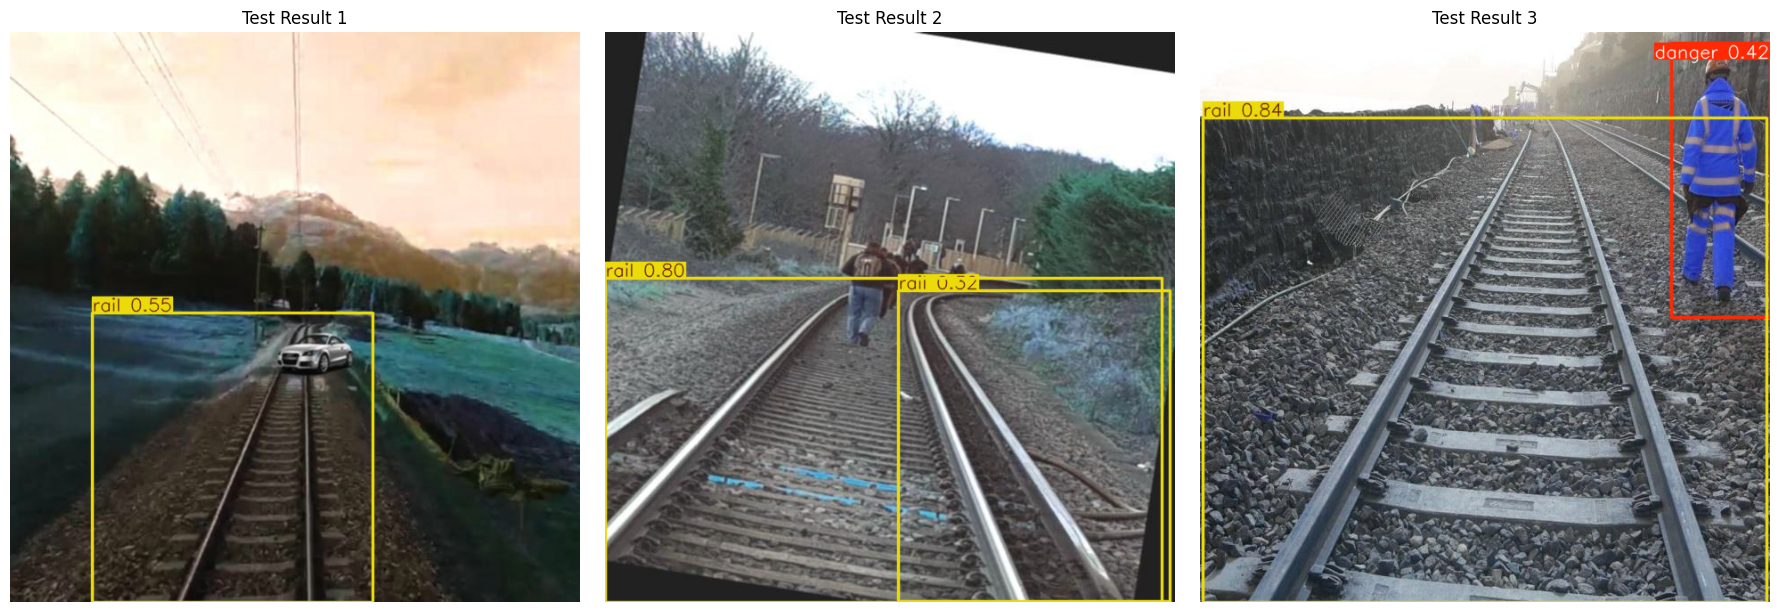

In [13]:
# Test Model
results = model('/content/datasets/Traintracks-4/test/images', batch=16, save=True)

# Display only the first 3 images
import matplotlib.pyplot as plt

subset = results[:3]

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, result in enumerate(subset):
    img = result.plot()
    axes[i].imshow(img)
    axes[i].set_title(f"Test Result {i+1}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [17]:
# DELETE: Download the results

import shutil
from google.colab import files

shutil.make_archive('runs_detect', 'zip', '/content/yolov12/runs/detect')

files.download('runs_detect.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>